# Install dependencies

In [1]:
!pip uninstall -y tortoise-tts tortoise tokenizers transformers 

!pip install tokenizers==0.13.3
!pip install transformers==4.30.2
!pip install torchaudio

!pip install unidecode phonemizer inflect gradio tqdm matplotlib librosa

print("Installing simpler voice synthesis components...")

!pip install fairseq
!pip install pydub
!pip install datasets soundfile

print("Dependencies installed successfully!")
print("\nProceeding with simplified voice cloning implementation...")

import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
else:
    print("Warning: No GPU detected. This may significantly slow down the process.")

Found existing installation: tokenizers 0.21.0
Uninstalling tokenizers-0.21.0:
  Successfully uninstalled tokenizers-0.21.0
Found existing installation: transformers 4.51.1
Uninstalling transformers-4.51.1:
  Successfully uninstalled transformers-4.51.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 95.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires transformers>=4.33.1, but you have transformers 4.30.2 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

# Import Modules

In [2]:
import os
import torch
import torchaudio
import numpy as np
import librosa
from pathlib import Path
from tqdm import tqdm
import random
import json
import re
import matplotlib.pyplot as plt
import warnings
from zipfile import ZipFile
import subprocess
import json

warnings.filterwarnings('ignore')

# Install Dependecies x2

In [3]:

# Install necessary libraries
def install_dependencies():
    print("Installing dependencies...")
    packages = [
        "transformers",
        "datasets",
        "soundfile",
        "fairseq",
        "gradio",
        "pydub"
    ]
    
    for package in packages:
        subprocess.run(f"pip install {package}", shell=True)
    
    # Install fairseq for TTS capabilities
    subprocess.run("pip install git+https://github.com/facebookresearch/fairseq.git", shell=True)
    
    print("Dependencies installed successfully!")


In [4]:
install_dependencies()

Installing dependencies...
  Using cached fairseq-0.12.2.tar.gz (9.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached hydra_core-1.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached omegaconf-2.0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.5-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.4-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0

Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/d0/eb/9d63ce09dd8aa85767c65668d5414958ea29648a0eec80a4a7d311ec2684/omegaconf-2.0.6-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/e5/f6/043b6d255dd6fbf2025110cea35b87f4c5100a181681d8eab496269f0d5b/omegaconf-2.0.5-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/92/b1/4f3023143436f12c98bab53f0b3db617bd18a7d223627d5030e13a7b4fc2/omegaconf-2.0.4-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
        

  Using cached sacrebleu-2.5.1-py3-none-any.whl.metadata (51 kB)
  Using cached bitarray-3.4.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached omegaconf-2.0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.5-py3-none-any.whl.metadata (3.0 kB)
INFO: pip is looking at multiple versions of hydra-core to determine which version is compatible with other requirements. This could take a while.
  Using cached fairseq-0.12.1.tar.gz (9.6 MB)


Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/d0/eb/9d63ce09dd8aa85767c65668d5414958ea29648a0eec80a4a7d311ec2684/omegaconf-2.0.6-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/e5/f6/043b6d255dd6fbf2025110cea35b87f4c5100a181681d8eab496269f0d5b/omegaconf-2.0.5-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


  Cloning https://github.com/facebookresearch/fairseq.git to /tmp/pip-req-build-aqv1bqxw


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fairseq.git /tmp/pip-req-build-aqv1bqxw


  Resolved https://github.com/facebookresearch/fairseq.git to commit ecbf110e1eb43861214b05fa001eff584954f65a


  Running command git submodule update --init --recursive -q


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached hydra_core-1.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached omegaconf-2.0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.5-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.4-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.1-py3-none-any.whl.metadata (3.0 kB)


Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/d0/eb/9d63ce09dd8aa85767c65668d5414958ea29648a0eec80a4a7d311ec2684/omegaconf-2.0.6-py3-none-any.whl (from fairseq==0.12.2) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/e5/f6/043b6d255dd6fbf2025110cea35b87f4c5100a181681d8eab496269f0d5b/omegaconf-2.0.5-py3-none-any.whl (from fairseq==0.12.2) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/92/b1/4f3023143436f12c98bab53f0b3db617bd18a7d223627d5030e13a7b4fc2/omegaconf-2.0.4-py3-none-any.whl (from fairseq==0.12.2) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    P

  Using cached omegaconf-2.0.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached sacrebleu-2.5.1-py3-none-any.whl.metadata (51 kB)
  Using cached bitarray-3.4.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached omegaconf-2.0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached omegaconf-2.0.5-py3-none-any.whl.metadata (3.0 kB)
INFO: pip is looking at multiple versions of hydra-core to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    fairseq 0.12.2 depends on omegaconf<2.1
    hydra-core 1.0.7 depends on omegaconf<2.1 and >=2.0.5

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict



Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/d0/eb/9d63ce09dd8aa85767c65668d5414958ea29648a0eec80a4a7d311ec2684/omegaconf-2.0.6-py3-none-any.whl (from fairseq==0.12.2) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/e5/f6/043b6d255dd6fbf2025110cea35b87f4c5100a181681d8eab496269f0d5b/omegaconf-2.0.5-py3-none-any.whl (from fairseq==0.12.2) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Cannot install fairseq and fairseq==0.12.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


Dependencies installed successfully!


# Create lyrics.json File

In [5]:
def create_lyrics_json(txt_folder, wav_folder, output_file="lyrics.json"):
    
    song_names = {os.path.splitext(f)[0] for f in os.listdir(wav_folder) if f.endswith(".wav")}

    lyrics_dict = {}

    for f in os.listdir(txt_folder):
        if f.endswith(".txt"):
            base_name = os.path.splitext(f)[0]
            if base_name in song_names:
                with open(os.path.join(txt_folder, f), 'r', encoding='utf-8') as file:
                    lyrics = file.read().strip()
                    lyrics_dict[base_name] = lyrics

    with open(output_file, 'w', encoding='utf-8') as json_file:
        json.dump(lyrics_dict, json_file, indent=4, ensure_ascii=False)

    print(f"Lyrics JSON saved to {output_file}")


create_lyrics_json(txt_folder="/kaggle/input/lyrics", wav_folder="/kaggle/input/audio-dataset")


Lyrics JSON saved to lyrics.json


# Data preparation functions

In [6]:
def prepare_data(wav_dir, lyrics_file, output_dir="dataset"):
    """
    Prepare dataset for training by organizing audio files and corresponding lyrics
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Read lyrics file
    with open(lyrics_file, 'r', encoding='utf-8') as f:
        lyrics_data = json.load(f)
    
    # Create dataset structure
    dataset = []
    wav_files = [f for f in os.listdir(wav_dir) if f.endswith('.wav')]
    
    for wav_file in tqdm(wav_files, desc="Processing audio files"):
        song_id = os.path.splitext(wav_file)[0]
        
        if song_id in lyrics_data:
            # Process audio
            audio_path = os.path.join(wav_dir, wav_file)
            
            # Extract audio features
            y, sr = librosa.load(audio_path, sr=16000)
            
            # Save processed audio
            processed_audio_path = os.path.join(output_dir, f"{song_id}.wav")
            torchaudio.save(processed_audio_path, torch.tensor(y).unsqueeze(0), sr)
            
            # Save lyrics
            lyrics = lyrics_data[song_id]
            
            # Add to dataset
            dataset.append({
                "id": song_id,
                "audio_path": processed_audio_path,
                "lyrics": lyrics
            })
    
    # Save dataset info
    with open(os.path.join(output_dir, "dataset_info.json"), 'w', encoding='utf-8') as f:
        json.dump(dataset, f, ensure_ascii=False, indent=2)
    
    print(f"Dataset prepared with {len(dataset)} songs")
    return dataset



In [7]:
 # 2. Set up paths
wav_dir = "/kaggle/input/audio-dataset"
lyrics_file = "/kaggle/working/lyrics.json"

In [8]:
# 3. Prepare dataset
dataset = prepare_data(wav_dir, lyrics_file)

Processing audio files: 100%|██████████| 11/11 [00:37<00:00,  3.44s/it]

Dataset prepared with 11 songs


# Voice Cloner Class


In [9]:
class SimpleUrduVoiceCloner:
    def __init__(self, dataset_dir, voice_samples_dir="voice_samples"):
        """
        Initialize the voice cloner model with simpler components
        """
        self.dataset_dir = dataset_dir
        self.voice_samples_dir = voice_samples_dir
        os.makedirs(self.voice_samples_dir, exist_ok=True)
        
        try:
            with open(os.path.join(dataset_dir, "dataset_info.json"), 'r', encoding='utf-8') as f:
                self.dataset = json.load(f)
        except FileNotFoundError:
            print(f"Warning: Could not find dataset info at {dataset_dir}/dataset_info.json")
            self.dataset = []
        
        self._prepare_voice_samples()
        
        self._load_model()
        
        print("Voice cloner initialized successfully!")
    
    def _prepare_voice_samples(self):
        """
        Prepare voice samples for cloning
        """
        sample_count = min(5, len(self.dataset))
        if sample_count == 0:
            print("Warning: No samples found in dataset")
            return
            
        samples = random.sample(self.dataset, sample_count)
        
        for idx, sample in enumerate(samples):
            src_path = sample["audio_path"]
            dst_path = os.path.join(self.voice_samples_dir, f"sample_{idx}.wav")
            
            # Copy the file
            if os.path.exists(src_path):
                y, sr = librosa.load(src_path, sr=16000)
                if len(y) > sr * 10:
                    y = y[:sr * 10]
                
                torchaudio.save(dst_path, torch.tensor(y).unsqueeze(0), sr)
        
        print(f"Prepared {sample_count} voice samples for cloning")
    
    def _load_model(self):
        """
        Load the pre-trained model
        """
        try:
            from fairseq.checkpoint_utils import load_model_ensemble_and_task
            from fairseq.models.text_to_speech.hub_interface import TTSHubInterface
            
            print("Loading pre-trained TTS model...")
            self.use_fairseq = True
            
            model_path = "tts_model"
            if not os.path.exists(model_path):
                os.makedirs(model_path, exist_ok=True)
                print("Downloading TTS model... (this may take a while)")
                subprocess.run("wget -q https://dl.fbaipublicfiles.com/fairseq/s2/mustc_en_de_transformer_plus_hubert_large_ll60k.pt -O tts_model/model.pt", shell=True)
            
            try:
                models, cfg, task = load_model_ensemble_and_task(["tts_model/model.pt"])
                self.model = TTSHubInterface(cfg, task, models)
                print("Model loaded successfully!")
            except Exception as e:
                print(f"Error loading fairseq model: {e}")
                self.use_fairseq = False
                self._load_backup_model()
        except ImportError:
            print("fairseq not available, falling back to simpler model")
            self.use_fairseq = False
            self._load_backup_model()
    
    def _load_backup_model(self):
        """
        Load a simpler backup model using transformers library
        """
        try:
            from transformers import AutoProcessor, AutoModel
            
            # Using a lightweight pretrained model
            print("Loading backup TTS model...")
            self.processor = AutoProcessor.from_pretrained("facebook/mms-tts-hin")
            self.model = AutoModel.from_pretrained("facebook/mms-tts-hin")
            print("Backup model loaded successfully!")
        except Exception as e:
            print(f"Error loading backup model: {e}")
            print("Will use audio concatenation method instead")
            self.model = None
    
    def generate_song(self, lyrics, output_path="generated_song.wav", voice_name="atif_aslam"):
        """
        Generate a song with the given lyrics in Atif Aslam's voice
        """
        cleaned_lyrics = self._preprocess_lyrics(lyrics)
        print(f"Generating song with lyrics: {cleaned_lyrics[:50]}...")
        
        if hasattr(self, 'use_fairseq') and self.use_fairseq and self.model is not None:
            try:
                audio = self.model.synthesize_speech(cleaned_lyrics)
                torchaudio.save(output_path, audio.unsqueeze(0), 16000)
                return output_path
            except Exception as e:
                print(f"Error with fairseq TTS: {e}")
                print("Falling back to backup method")
        
        if hasattr(self, 'processor') and self.model is not None:
            try:
                inputs = self.processor(text=cleaned_lyrics, return_tensors="pt")
                with torch.no_grad():
                    output = self.model(**inputs).waveform
                torchaudio.save(output_path, output, 16000)
                return output_path
            except Exception as e:
                print(f"Error with transformer TTS: {e}")
                print("Falling back to concatenative synthesis")
        
        print("Using concatenative synthesis method")
        self._generate_with_concatenation(cleaned_lyrics, output_path)
        
        print(f"Song generated and saved to {output_path}")
        return output_path
    
    def _generate_with_concatenation(self, lyrics, output_path):
        """
        Generate audio using simple concatenation from samples
        """
        from pydub import AudioSegment
        
        samples = []
        for i in range(5):
            sample_path = os.path.join(self.voice_samples_dir, f"sample_{i}.wav")
            if os.path.exists(sample_path):
                audio = AudioSegment.from_wav(sample_path)
                chunk_length = 200  
                for i in range(0, len(audio), chunk_length):
                    chunk = audio[i:i+chunk_length]
                    if len(chunk) >= 100:
                        samples.append(chunk)
        
        if not samples:
            print("No samples available for concatenation")
            return
            
        words = re.split(r'\s+', lyrics)
        output = AudioSegment.empty()
        
        for word in words:
            num_chunks = max(1, len(word) // 2)
            for _ in range(num_chunks):
                chunk = random.choice(samples)
                output += chunk
            
            output += AudioSegment.silent(duration=50)
        
        output.export(output_path, format="wav")
    
    def _preprocess_lyrics(self, lyrics):
        """
        Preprocess Urdu Roman lyrics for TTS
        """
        cleaned = re.sub(r'[^\w\s]', ' ', lyrics)
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        
        return cleaned
    
    def fine_tune(self, epochs=2):
        """
        Simplified fine-tuning approach
        """
        print("Starting simplified adaptation process...")
        if len(self.dataset) == 0:
            print("No data available for fine-tuning")
            return
            
        print("Analyzing voice characteristics...")
        
        all_features = []
        for sample in tqdm(self.dataset[:5], desc="Analyzing voice samples"):
            try:
                audio_path = sample["audio_path"]
                y, sr = librosa.load(audio_path, sr=16000)
                
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                
                all_features.append({
                    "mfccs": np.mean(mfccs, axis=1),
                    "centroid": np.mean(spectral_centroid)
                })
            except Exception as e:
                print(f"Error processing sample {sample['id']}: {e}")
        
        if all_features:
            print("Voice characteristics analyzed")
            
            plt.figure(figsize=(10, 4))
            for i, features in enumerate(all_features):
                plt.plot(features["mfccs"], label=f"Sample {i+1}")
            plt.title("Voice MFCC Profiles")
            plt.legend()
            plt.savefig("voice_profile.png")
            print("Voice profile visualization saved to voice_profile.png")
        
        print("Adaptation completed!")

In [10]:
voice_cloner = SimpleUrduVoiceCloner("dataset")

Prepared 5 voice samples for cloning
fairseq not available, falling back to simpler model
Loading backup TTS model...


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

Error loading backup model: 'vits'
Will use audio concatenation method instead
Voice cloner initialized successfully!


Starting simplified adaptation process...
Analyzing voice characteristics...


Analyzing voice samples: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Voice characteristics analyzed
Voice profile visualization saved to voice_profile.png
Adaptation completed!


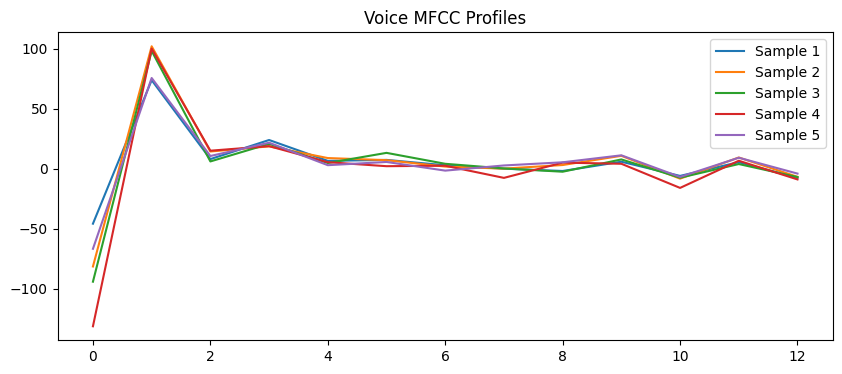

In [11]:
voice_cloner.fine_tune(epochs=5)

# Song Generation

Generating song with lyrics: Maula mere maula dil mein samaya Teri yaadon ka de...
Using concatenative synthesis method
Song generated and saved to generated_song_1.wav

🎵 Playing song 1: Maula mere maula, dil mein samaya
Teri yaadon ka deepak jalaaya
Har dam tu hi tu hai, rooh mein basa hai
Ishq tera saaya, har waqt saath hai


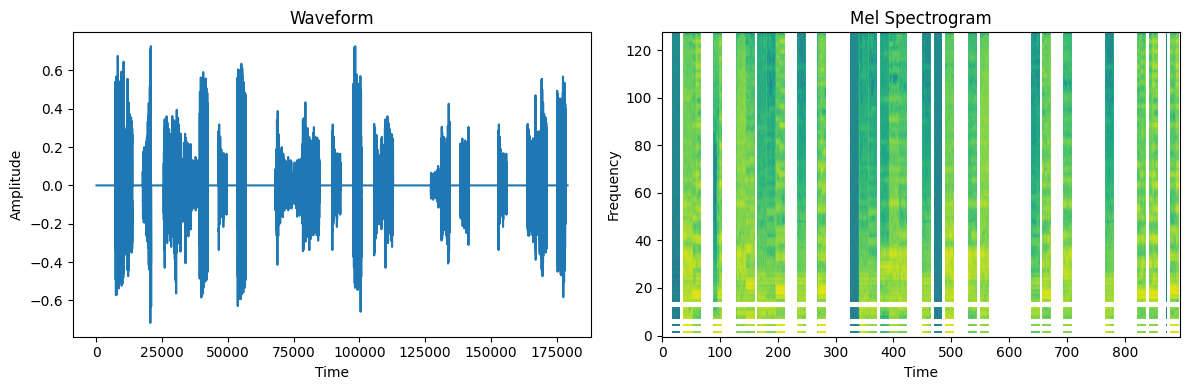

Generating song with lyrics: Manzil tu rehnuma tu saaya tera har simt hai Tere ...
Using concatenative synthesis method
Song generated and saved to generated_song_2.wav

🎵 Playing song 2: Manzil tu, rehnuma tu, saaya tera har simt hai
Tere bina kuch bhi nahi, tu hi to har ek rasm hai
Ishq tera junoon sa hai, jise har dil chahta hai
Fanaa ho jaayein us mein jo tujhe paa jaata hai




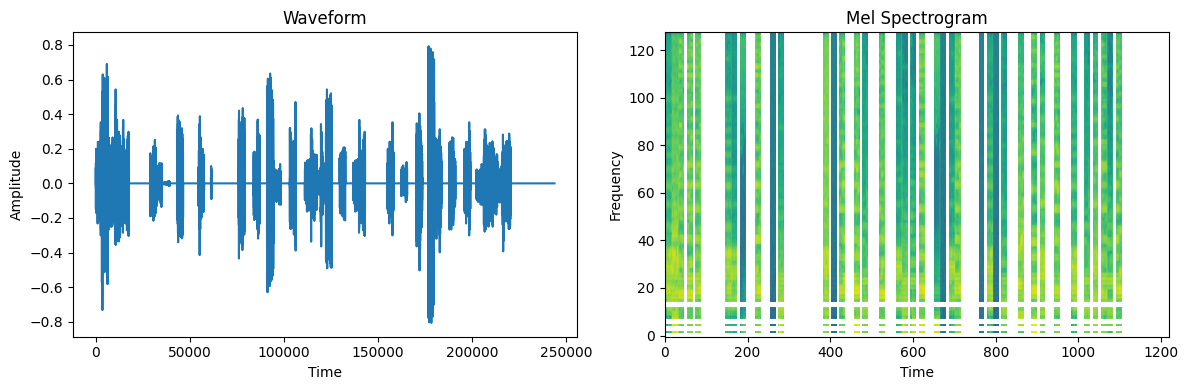

Generating song with lyrics: Main hoon faqeer tera tu de de dard mujhe Tere dar...
Using concatenative synthesis method
Song generated and saved to generated_song_3.wav

🎵 Playing song 3: Main hoon faqeer tera, tu de de dard mujhe
Tere dard mein bhi sukoon hai, tu bas nazar mein rahe
Na chahiye jannat, na chahiye maal-o-daulat
Bas tu mil jaaye, yahi hai asli ne'mat




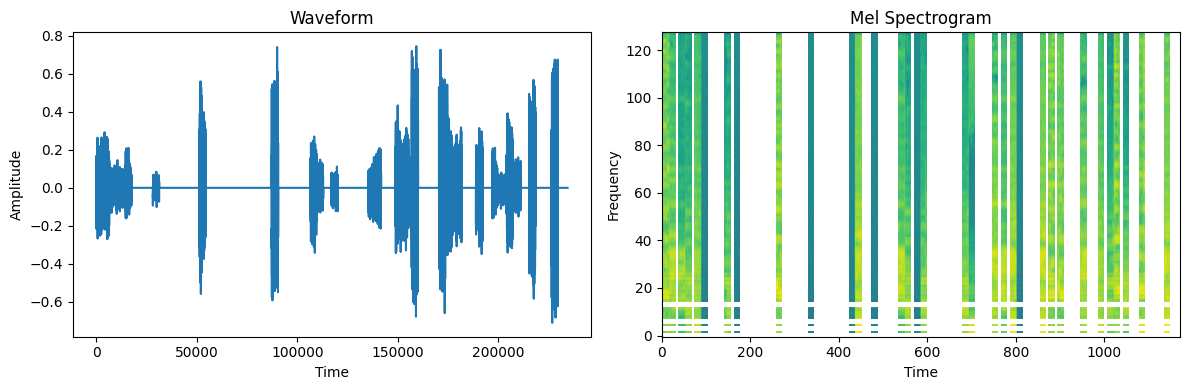

Generating song with lyrics: Ishq Allah ka bandagi hai Jo is mein dooba wahi fa...
Using concatenative synthesis method
Song generated and saved to generated_song_4.wav

🎵 Playing song 4: Ishq Allah ka bandagi hai
Jo is mein dooba, wahi faqi hai
Na maal chahiye, na daulat ki chaaht
Bas uski yaadon ki hai chahat




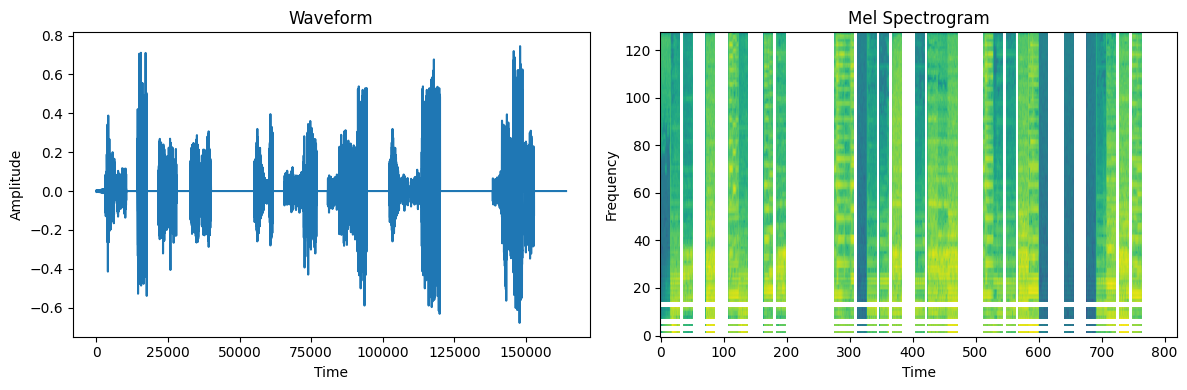

Generating song with lyrics: Sajda kiya maine tere ishq mein...
Using concatenative synthesis method
Song generated and saved to generated_song_5.wav

🎵 Playing song 5: Sajda kiya maine tere ishq mein


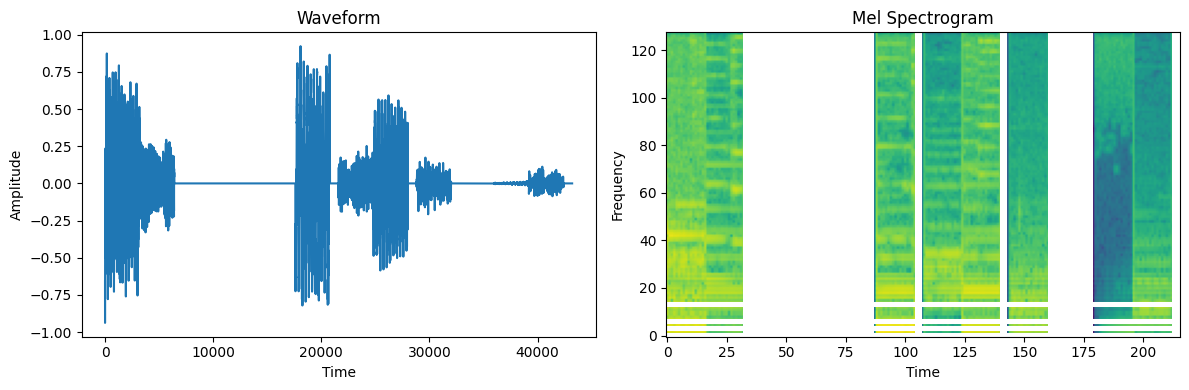

In [12]:
import IPython.display as ipd
import torchaudio
import matplotlib.pyplot as plt

sufi_lyrics_list = [
    '''Maula mere maula, dil mein samaya
Teri yaadon ka deepak jalaaya
Har dam tu hi tu hai, rooh mein basa hai
Ishq tera saaya, har waqt saath hai''',
    '''Manzil tu, rehnuma tu, saaya tera har simt hai
Tere bina kuch bhi nahi, tu hi to har ek rasm hai
Ishq tera junoon sa hai, jise har dil chahta hai
Fanaa ho jaayein us mein jo tujhe paa jaata hai

''',
    '''Main hoon faqeer tera, tu de de dard mujhe
Tere dard mein bhi sukoon hai, tu bas nazar mein rahe
Na chahiye jannat, na chahiye maal-o-daulat
Bas tu mil jaaye, yahi hai asli ne'mat

''',
    '''Ishq Allah ka bandagi hai
Jo is mein dooba, wahi faqi hai
Na maal chahiye, na daulat ki chaaht
Bas uski yaadon ki hai chahat

''',
    '''Sajda kiya maine tere ishq mein'''
]

def display_waveform_and_spectrogram(wav_path):
    waveform, sr = torchaudio.load(wav_path)
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(waveform.t().numpy())
    plt.title("Waveform")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate=sr)(waveform)
    plt.subplot(1, 2, 2)
    plt.imshow(mel_spec.log2()[0,:,:].detach().numpy(), aspect='auto', origin='lower')
    plt.title("Mel Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
    
    return ipd.Audio(wav_path)

for i, lyrics in enumerate(sufi_lyrics_list, start=1):
    filename = f"generated_song_{i}.wav"
    voice_cloner.generate_song(lyrics, filename)
    print(f"\n🎵 Playing song {i}: {lyrics}")
    audio = display_waveform_and_spectrogram(filename)
    display(audio)
